Chúc các bạn làm bài tốt!

# Load thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# from abc import abstractmethod

# 1: Implement lại thuật toán Linear Regression

In [2]:
class LinearRegression():
    def __init__(self):
        super().__init__()
        self.ecoeff = None    
    
    def fit(self,X,y):
        X = np.insert(X,0,1,axis = 1)
        XTx = np.dot(X.T, X)
        Xtx_inv = np.linalg.inv(XTx)
        XTy = np.dot(X.T, y)
        self.ecoeff = np.dot(Xtx_inv,XTy)
        
    def predict(self,X):
        X = np.insert(X, 0, 1, axis = 1)
        y_pred = np.dot(X, self.ecoeff)
        return y_pred


In [3]:
# 2a: Fit dữ liệu trong file linear.csv và visualize
data = pd.read_csv("linear.csv",sep=",")
data.colums = ['area', 'price']
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16784\1706661590.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.colums = ['area', 'price']


Diện tích      Giá
0    30.0000  448.524
1    32.4138  509.248
2    34.8276  535.104
3    37.2414  551.432
4    39.6552  623.418

[ 449.26845534  485.98498632  522.70151729  559.41804826  596.13457923
  632.85111021  669.56764118  706.28417215  742.99918201  779.71571299
  816.43224396  853.14877493  889.8653059   926.58183687  963.29836785
 1000.01489882 1036.73142979 1073.44796076 1110.16449174 1146.88102271
 1183.59755368 1220.31408465 1257.02909452 1293.74562549 1330.46215646
 1367.17868743 1403.89521841 1440.61174938 1477.32828035 1514.04481132]


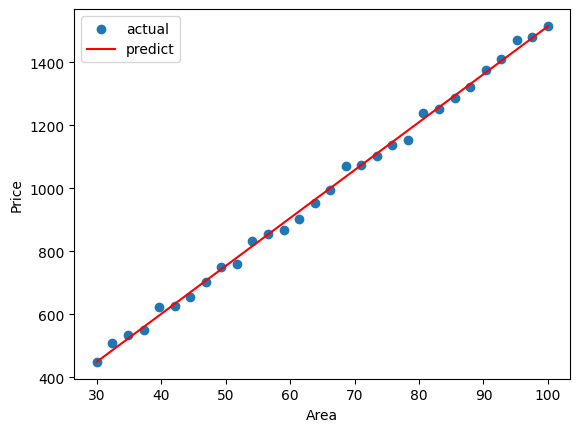

In [4]:
regressor = LinearRegression()
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
regressor.fit(X,y)
y_pred = regressor.predict(X)
print(y_pred)
import matplotlib.pyplot as plt
plt.scatter(X, y, label = 'actual')
plt.plot(X, y_pred, 'r', label = 'predict')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()


# 2b: Tính loss Root Mean Squared Error - RMSE

In [5]:
# regressor = LinearRegression()
# w = regressor.fit(X,y)
# y_pred = regressor.predict(X)
# rsme = 0
# for i in range(0, len(y)):
#     rsme =rsme + ((y_pred[i] - y[i] )**2)

def mean_squared_error(y_pred, y):
    return np.mean((y_pred - y)**2)

print(mean_squared_error(y_pred, y))

246.61987849112512


#3a: Fit dữ liệu trong file nonLinear.csv

In [6]:
data = pd.read_csv("nonLinear.csv",sep=",")
regressor = LinearRegression()
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
regressor.fit(X,y)
y_pred = regressor.predict(X)

print(mean_squared_error(y_pred, y))

151913.44790611096


# 3b: Visualize kết quả

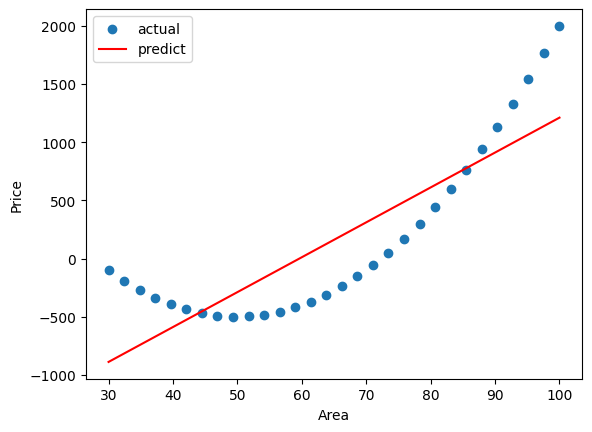

In [7]:
# Code trong cell này.
import matplotlib.pyplot as plt
plt.scatter(X, y, label = 'actual')
plt.plot(X, y_pred, 'r', label = 'predict')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3c: Nhận xét

Đây là cell markdown, hãy ghi nhận xét của bạn ở đây

In [ ]:
Đường dự đoán không trùng khớp với dữ liệu

# 4: Cải thiện model

[ -99.99908082 -190.7248871  -269.79780933 -337.21784751 -392.98500165
 -437.09927175 -469.56065781 -490.36915981 -499.52463985 -497.02785653
 -482.87818916 -457.07563775 -419.6202023  -370.5118828  -309.75067926
 -237.33659168 -153.26962004  -57.54976437   49.82297535  168.84859911
  299.52710692  441.85849878  595.83615397  761.47283116  938.76239238
 1127.70483765 1328.30016697 1540.54838033 1764.44947773 2000.00345918]


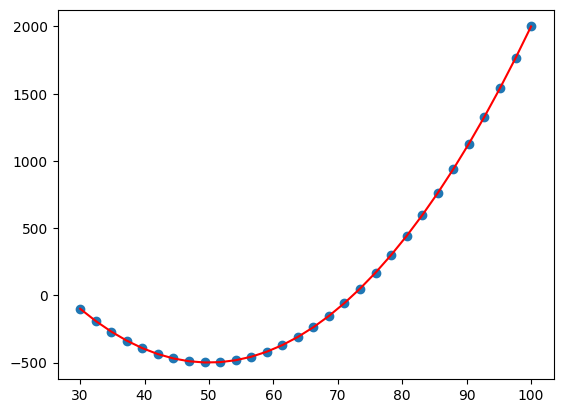

In [34]:
# Code trong cell này.
data = pd.read_csv("nonLinear.csv",sep=",")
square_of_area = data.iloc[:, 0]**2
data.insert(0,"Binh phuong dien tich",square_of_area, True )
X = data.iloc[:, 0:2].to_numpy()
y = data.iloc[:, -1].to_numpy()
regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
print(y_pred)
plt.scatter(X[:,1], y, label = 'actual')
plt.plot(X[:,1],y_pred,'r')
plt.show()

# 5: Thử nghiệm với dữ liệu sample.csv

In [35]:
data = pd.read_csv("sample.csv" ,sep=",")
data.head()

Unnamed: 0  %Fat  Femoral Neck         Kg  Activity    %Fat S       pound
0           0  25.3         0.934  52.163126   3508.44 -3.265217  115.918058
1           1  29.3         0.888  61.801964   2773.54  0.734783  137.337699
2           2  37.7         0.933  93.440034   1738.97  9.134783  207.644521
3           3  32.8         0.757  59.874197   1665.29  4.234783  133.053771
4           4  24.6         1.031  50.348756   3982.95 -3.965217  111.886125

In [ ]:
X = data[["pound" , ]].values
y = data[["Kg"]].values
plt.scatter(X_p, y, label = 'actual')
plt.plot(X_p,y_pred , 'r')
plt.show()

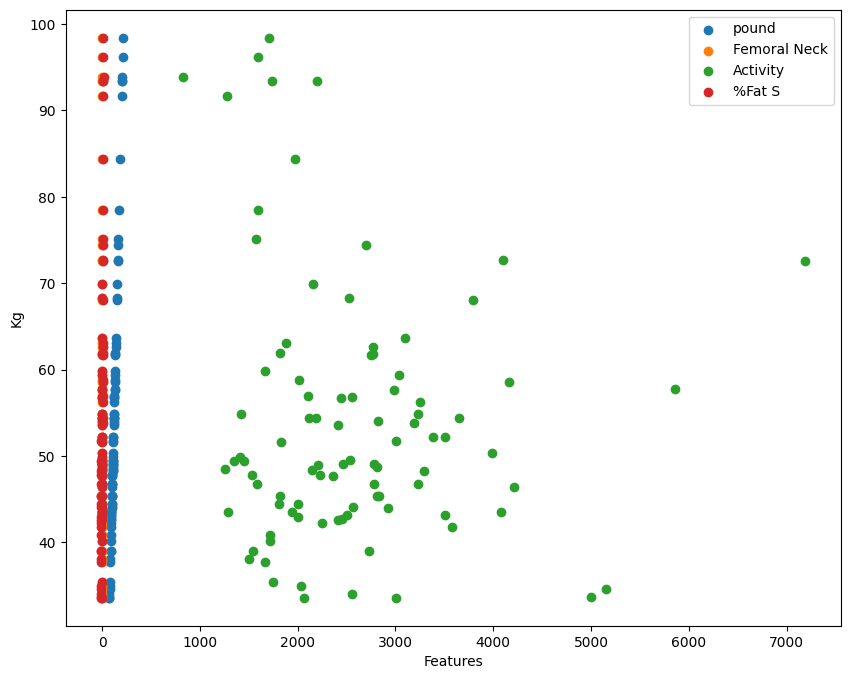

In [58]:
X = data[["pound", "Femoral Neck" , "Activity" , "%Fat S"]].values
y = data[["Kg"]].values
fig , ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:,0], y, label = 'pound')
ax.scatter(X[:,1], y, label = 'Femoral Neck')
ax.scatter(X[:,2], y, label = 'Activity')
ax.scatter(X[:,3], y, label = '%Fat S')
ax.set_xlabel('Features')
ax.set_ylabel('Kg')
ax.legend()
plt.show()

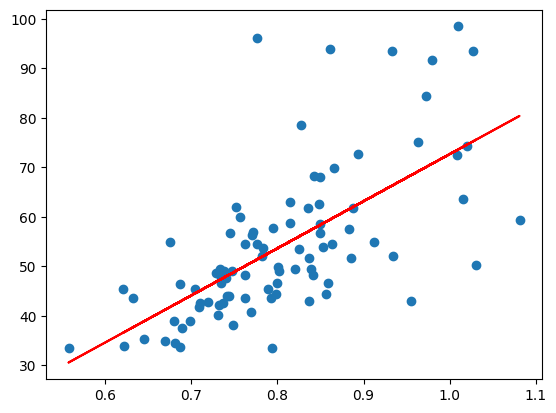

In [45]:
X_FN= data[["Femoral Neck"]].values
y = data[["Kg"]].values
regressor = LinearRegression()
regressor.fit(X_FN,y)
y_pred = regressor.predict(X_FN)
plt.scatter(X_FN, y, label = 'actual')
plt.plot(X_FN,y_pred , 'r')
plt.show()

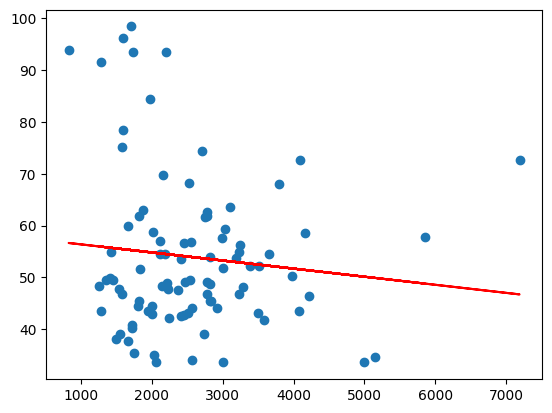

In [46]:

X_ac = data[["Activity"]].values
regressor = LinearRegression()
regressor.fit(X_ac,y)
y_pred = regressor.predict(X_ac)
plt.scatter(X_ac, y, label = 'actual')
plt.plot(X_ac,y_pred , 'r')
plt.show()

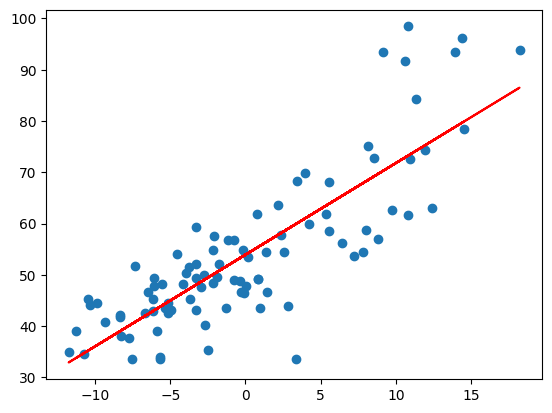

In [47]:
X_F = data[["%Fat S"]].values
y = data[["Kg"]].values
regressor = LinearRegression()
regressor.fit(X_F,y)
y_pred = regressor.predict(X_F)
plt.scatter(X_F, y, label = 'actual')
plt.plot(X_F,y_pred , 'r')
plt.show()